In [1]:
import pandas as pd

df = pd.read_csv('soil_quality_dataset.csv')

df.head()

,Soil Temperature (°C),Soil Humidity (%),Soil Quality
0,21.236204,51.660894,0.820362
1,38.521429,35.530200,0.489485
2,31.959818,10.376293,0.590972
3,27.959755,49.276141,0.887134
4,14.680559,72.759929,0.466173


In [2]:
df.columns

Index(['Soil Temperature (°C)', 'Soil Humidity (%)', 'Soil Quality'], dtype='object')

In [2]:
#  Normalize numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Display processed data
df.head()

,Soil Temperature (°C),Soil Humidity (%),Soil Quality
0,0.374540,0.595156,0.820364
1,0.950716,0.364717,0.489486
2,0.731995,0.005375,0.590973
3,0.598659,0.561088,0.887137
4,0.156018,0.896571,0.466174


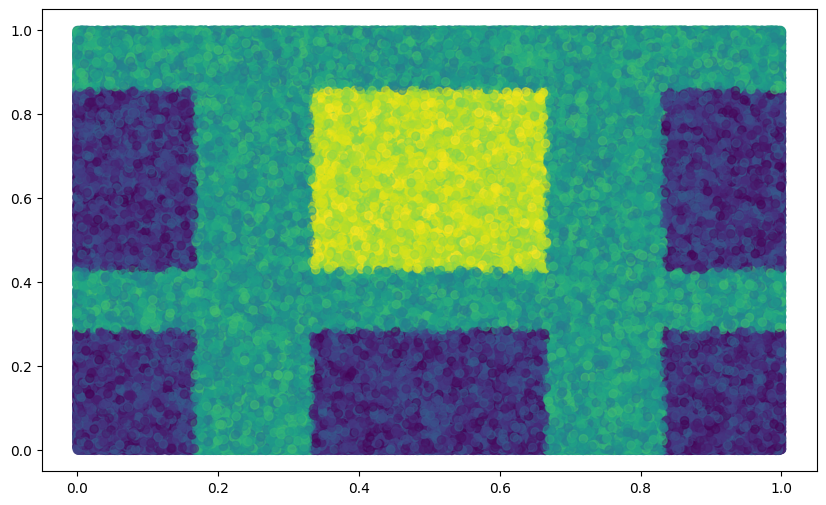

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Soil Temperature (°C)"], df["Soil Humidity (%)"], 
                      c=df["Soil Quality"], cmap="viridis", alpha=0.5)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Soil Quality"])  
y = df["Soil Quality"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [7]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.01
R² Score: 0.8947000575225185


In [8]:
xgb_model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
import pickle

# Save the model to a pickle file
with open("Soil_Quality_From_Temp&Humid.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully!")


Model saved successfully!
